In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#I am going to use keras for creating convolution neural network
import keras
#I am using sequential model . model from keras.models can also be used and create layers as functions 
from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [6]:
# Data loading you need to download mnist from kaggle and keep it in the same directory as this notebook to run this cell

ds = pd.read_csv('train.csv')
ds.shape
data = ds.values

In [7]:
#converting range of each pixel from 0 to 1.
X = data[:, 1:]/255.0
#Converting each y from just the class value(42000,1) to a vector representing 1 for the class (42000,10)
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(42000, 784) (42000, 10)


In [8]:
#Creating training and testing data
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(33600, 28, 28, 1) (8400, 28, 28, 1)
(33600, 10) (8400, 10)


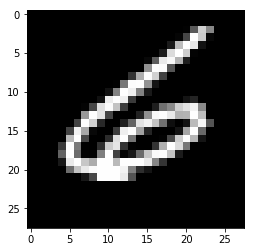

In [9]:
n_img = 21
#Just printing a random image in the mnist dataset
plt.imshow(X_train[n_img].reshape((28, 28)), cmap='gray')
plt.show()

In [10]:
# Build the model sequential

model = Sequential()

#adding the first convolution layer with 32 kernels and kernel size 3*3.Since it is rgb we have 1 feature map in the
#input image. this will output an image with 26,26,32 32 feature maps for each kernel even if the image was rgb
#we would have still got 32 feature maps as each kernel would have calculated a feature map for each of the three and 
#taken it's average. relu seems to be a nice activation in this case though sigmoid would also work.Parameter involved
#would be 32*9(weights inside each kernel) + 32(bias of each kernel) .

model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

#Second layer with 16 kernels and each kernel 3*3 it gives us 24,24,16 i.e. 16 feature maps. The number of parameters 
#are 16*9*32(wieghts inside kernel) + 16(bias of each kernel)

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

#We add a layer of maxpool in this the kernel(size = 2,2) fits over 2*2 block of image and takes the max value from the
#4 cells thus the image is of size = 24/2,24/2,16 = 12,12,16

model.add(MaxPool2D(pool_size=(2, 2)))

#Third layer of convolution with 8 kernels of size 3*3 this results in an image of size 10,10,8 with 8 feature maps 
#and 8*16*9(weights inside kernel)+8(bias) = 1160 parameters

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

#Second maxpool layer again of size 2*2 thus resulting image is of size = 10/2,10/2,8 = 5,5,8

model.add(MaxPool2D(pool_size=(2, 2)))

#flatten the image to 5*5*8 = 200 (200,1) so that final pred could be done as final layer is dense it needs a vector 
#while convolutions needed a matrix

model.add(Flatten())

#To prevent overfitting drop out is added.

model.add(Dropout(0.4))

#final layer for prediction it is using softmax to calculate probability for the 10 classes. 

model.add(Dense(10))
model.add(Activation('softmax'))

#We use categorical_crossentropy as loss function and adam as the optimizer . 

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 8)         0         
__________

In [11]:
#training takes over 8 minutes on my cpu based mac having gpu would make the whole time faster .
hist = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 55s - loss: 0.7683 - acc: 0.7428 - val_loss: 0.1695 - val_acc: 0.9536
Epoch 2/10
33600/33600 [==============================] - 47s - loss: 0.2594 - acc: 0.9193 - val_loss: 0.1147 - val_acc: 0.9676
Epoch 3/10
33600/33600 [==============================] - 47s - loss: 0.1905 - acc: 0.9404 - val_loss: 0.0931 - val_acc: 0.9727
Epoch 4/10
33600/33600 [==============================] - 50s - loss: 0.1617 - acc: 0.9493 - val_loss: 0.0893 - val_acc: 0.9733
Epoch 5/10
33600/33600 [==============================] - 47s - loss: 0.1482 - acc: 0.9552 - val_loss: 0.0770 - val_acc: 0.9762
Epoch 6/10
33600/33600 [==============================] - 49s - loss: 0.1331 - acc: 0.9598 - val_loss: 0.0674 - val_acc: 0.9788
Epoch 7/10
33600/33600 [==============================] - 49s - loss: 0.1235 - acc: 0.9618 - val_loss: 0.0603 - val_acc: 0.9819
Epoch 8/10
33600/33600 [==============================]

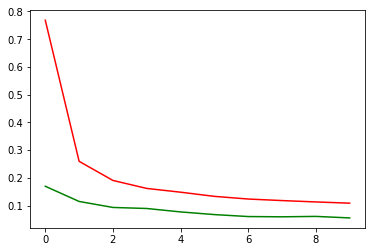

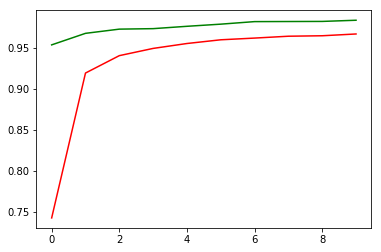

In [15]:
hdata = hist.history
#Plot of the validation loss (loss on testing set('g')) and loss on training set('r')
plt.figure(0)
plt.plot(hdata['loss'], 'r')
plt.plot(hdata['val_loss'], 'g')

plt.figure(1)
plt.plot(hdata['acc'], 'r')
plt.plot(hdata['val_acc'], 'g')

1152